# What's the Weather Like?

### Analysis
* ##### Observed trend 1

* ##### Observed trend 2

* ##### Observed trend 3

In [69]:
# Dependencies
import json
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import requests
from datetime import datetime
from citipy import citipy
from random import uniform
from config import owm_key

### Generate Cities List

In [70]:
# Select 500 unique cities
cities_df = pd.DataFrame(columns=("city","country","lat","lng","temp","humidity","cloudiness","wind_speed"))
def getCoordinates(quadrant):
    if quadrant == 1:
        x = uniform(0,90)
        y = uniform(0,-180)
        return x,y
    if quadrant == 2:
        x = uniform(0,90)
        y = uniform(0,180)
        return x,y
    if quadrant == 3:
        x = uniform(0,-90)
        y = uniform(0,180)
        return x,y
    x = uniform(0,-90)
    y = uniform(0,-180)
    return x,y

# Based on quadrant, generate a full range of cities, lng and lat
sample_size_lim = 500
sample_size = len(cities_df)
while sample_size < sample_size_lim:
    quadrant = (sample_size % 4) + 1
    point = (getCoordinates(quadrant))
    city = citipy.nearest_city(point[0], point[1])
    if not ((cities_df['city'] == city.city_name) & (cities_df['country'] == city.country_code)).any():
        #print(f"city: {city.city_name} country: {city.country_code}, coordinates: {point}")
        cities_df.loc[sample_size] = [city.city_name, city.country_code, point[0], point[1],'','','','']
    sample_size = len(cities_df)
cities_df.head(10)

,city,country,lat,lng,temp,humidity,cloudiness,wind_speed
0,constitucion,mx,17.437638,-122.909363,,,,
1,berezovyy,ru,51.969478,134.995063,,,,
2,souillac,mu,-63.225671,77.846783,,,,
3,ushuaia,ar,-58.859868,-53.413793,,,,
4,durango,us,37.632034,-107.588259,,,,
5,barentsburg,sj,85.665164,4.253506,,,,
6,isangel,vu,-20.142255,169.918954,,,,
7,cape town,za,-52.515965,-7.050183,,,,
8,tuktoyaktuk,ca,72.182664,-127.663188,,,,
9,ligayan,ph,3.571117,119.575850,,,,


### Perform API Calls

In [71]:
owm_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

for idx, row in cities_df.iterrows():
    print("Now retrieving weather for city: %s, #%s" % ( idx, row['city']))
    query_url = owm_url + "appid=" + owm_key + "&lat=" + str(row["lat"]) + "&lon=" + str(row["lng"]) + "&units=imperial&mode=json"
    print(query_url)
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    try:
        cities_df.set_value(idx,'temp',weather_json["main"]["temp"])
        cities_df.set_value(idx,'humidity',weather_json["main"]["humidity"])
        cities_df.set_value(idx,'cloudiness',weather_json["clouds"]["all"])
        cities_df.set_value(idx,'wind_speed',weather_json["wind"]["speed"])
    except:
        print("skipping city %s" % (row['city']))
cities_df.head(10)

Now retrieving weather for city: 0, #constitucion
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=17.437637905726717&lon=-122.9093625527269&units=imperial&mode=json


/Users/sean/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/Users/sean/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/Users/sean/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/Users/sean/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


Now retrieving weather for city: 1, #berezovyy
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=51.969478161930574&lon=134.99506326837908&units=imperial&mode=json
Now retrieving weather for city: 2, #souillac
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-63.225670703128436&lon=77.84678277565453&units=imperial&mode=json
Now retrieving weather for city: 3, #ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-58.85986760320072&lon=-53.41379330814923&units=imperial&mode=json
Now retrieving weather for city: 4, #durango
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=37.63203383069071&lon=-107.5882589592195&units=imperial&mode=json
Now retrieving weather for city: 5, #barentsburg
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=85.6651638337603&lon=4.2535061256945&units=imperial

Now retrieving weather for city: 42, #albany
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-66.09313685148128&lon=117.69357842989365&units=imperial&mode=json
Now retrieving weather for city: 43, #lebu
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-36.49709559990237&lon=-82.05675728147156&units=imperial&mode=json
Now retrieving weather for city: 44, #saint george
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=31.87017975812225&lon=-49.646142146095855&units=imperial&mode=json
Now retrieving weather for city: 45, #pyapon
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=16.33884148305053&lon=95.59727315747058&units=imperial&mode=json
Now retrieving weather for city: 46, #balikpapan
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-1.4423139288212927&lon=118.05537005202672&units=im

Now retrieving weather for city: 83, #coihaique
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-43.59937253551658&lon=-70.77124198906779&units=imperial&mode=json
Now retrieving weather for city: 84, #rapid city
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=44.14949261675477&lon=-103.26893644242683&units=imperial&mode=json
Now retrieving weather for city: 85, #dikson
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=81.71787814417092&lon=73.01896784053108&units=imperial&mode=json
Now retrieving weather for city: 86, #port-gentil
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-1.5191579063179605&lon=7.22924582792885&units=imperial&mode=json
Now retrieving weather for city: 87, #jamestown
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-25.021102759181094&lon=-16.31006411882195&un

Now retrieving weather for city: 123, #chuy
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-41.79017272009357&lon=-45.58165763694835&units=imperial&mode=json
Now retrieving weather for city: 124, #upernavik
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=81.38477904907346&lon=-58.32701770959979&units=imperial&mode=json
Now retrieving weather for city: 125, #antropovo
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=58.20047559544281&lon=43.20280137854833&units=imperial&mode=json
Now retrieving weather for city: 126, #mount gambier
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-39.30587026994277&lon=139.96183117586733&units=imperial&mode=json
Now retrieving weather for city: 127, #castro
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-47.955655656404886&lon=-86.36144508919386&u

Now retrieving weather for city: 163, #miranorte
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-9.46544565237337&lon=-49.143922123172025&units=imperial&mode=json
Now retrieving weather for city: 164, #sao filipe
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=8.210874151712954&lon=-34.2561522208992&units=imperial&mode=json
Now retrieving weather for city: 165, #nanchang
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=28.587124062844875&lon=115.61991516780499&units=imperial&mode=json
Now retrieving weather for city: 166, #kirakira
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-11.962372772952934&lon=160.73961018980503&units=imperial&mode=json
Now retrieving weather for city: 167, #constitucion
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-32.46001122315569&lon=-77.992175007

Now retrieving weather for city: 203, #neiafu
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-18.469109891970813&lon=-174.45653199775853&units=imperial&mode=json
Now retrieving weather for city: 204, #cayenne
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=16.457547077606915&lon=-42.51558898888857&units=imperial&mode=json
Now retrieving weather for city: 205, #oyama
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=34.25917790839849&lon=138.6156731937651&units=imperial&mode=json
Now retrieving weather for city: 206, #esperance
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-33.030548471204625&lon=124.90714616295897&units=imperial&mode=json
Now retrieving weather for city: 207, #codo
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-4.885678122640139&lon=-43.92239999731816&units=im

Now retrieving weather for city: 244, #longlac
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=52.42284644812958&lon=-86.92080811972522&units=imperial&mode=json
Now retrieving weather for city: 245, #zhanatas
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=45.32625452465508&lon=70.74495318186689&units=imperial&mode=json
Now retrieving weather for city: 246, #kasempa
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-13.893971283744921&lon=26.242004280652907&units=imperial&mode=json
Now retrieving weather for city: 247, #samusu
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-12.532589499335451&lon=-165.5817649156112&units=imperial&mode=json
Now retrieving weather for city: 248, #nador
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=33.60458717945665&lon=-2.692627173813973&units=imp

Now retrieving weather for city: 285, #sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=29.291138377735045&lon=162.25600713092746&units=imperial&mode=json
Now retrieving weather for city: 286, #biharamulo
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-2.7815785785818683&lon=31.266780385511904&units=imperial&mode=json
Now retrieving weather for city: 287, #general artigas
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-26.966836096563565&lon=-56.12166154479378&units=imperial&mode=json
Now retrieving weather for city: 288, #zirandaro
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=18.314316499654268&lon=-101.15851307572449&units=imperial&mode=json
Now retrieving weather for city: 289, #ostrovnoy
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=76.53675052548668&lon=43

Now retrieving weather for city: 325, #petropavlovsk-kamchatskiy
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=43.80117870857407&lon=165.08761770583595&units=imperial&mode=json
Now retrieving weather for city: 326, #karratha
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-16.50263510009629&lon=116.00591348816086&units=imperial&mode=json
Now retrieving weather for city: 327, #alta floresta
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-10.441285520229025&lon=-58.32267130135169&units=imperial&mode=json
Now retrieving weather for city: 328, #ponta do sol
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=33.59776887403071&lon=-20.772009692365042&units=imperial&mode=json
Now retrieving weather for city: 329, #chittaurgarh
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=24.815302348

Now retrieving weather for city: 365, #pevek
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=73.04067630085298&lon=167.35217441077722&units=imperial&mode=json
Now retrieving weather for city: 366, #port hedland
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-17.725091433300015&lon=119.35419561267379&units=imperial&mode=json
Now retrieving weather for city: 367, #corpus christi
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-24.280379736146298&lon=-55.11242656268653&units=imperial&mode=json
Now retrieving weather for city: 368, #klaksvik
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=70.86311462534428&lon=-4.403297548648388&units=imperial&mode=json
Now retrieving weather for city: 369, #tessalit
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=20.58761301788423&lon=1.41403702743

Now retrieving weather for city: 405, #rosetta
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=31.853042930587826&lon=30.848178891024325&units=imperial&mode=json
Now retrieving weather for city: 406, #walvis bay
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-25.231266369906066&lon=7.367317958813359&units=imperial&mode=json
Now retrieving weather for city: 407, #caririacu
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-6.760202760140399&lon=-39.271754448298914&units=imperial&mode=json
Now retrieving weather for city: 408, #teguise
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=30.95728195628417&lon=-12.445125387240704&units=imperial&mode=json
Now retrieving weather for city: 409, #vostok
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=51.912405125651354&lon=149.63365083486008&

Now retrieving weather for city: 445, #angul
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=21.132224646585193&lon=84.89929823622066&units=imperial&mode=json
Now retrieving weather for city: 446, #palu
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-1.5092670033759925&lon=118.99123819836257&units=imperial&mode=json
Now retrieving weather for city: 447, #boca do acre
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-8.168803487717753&lon=-67.91198503549998&units=imperial&mode=json
Now retrieving weather for city: 448, #codrington
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=24.246534234035877&lon=-49.114785419816556&units=imperial&mode=json
Now retrieving weather for city: 449, #tabat
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=14.513773172002555&lon=32.67677885685643&unit

Now retrieving weather for city: 486, #poum
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-21.507480120675055&lon=160.3992632018819&units=imperial&mode=json
Now retrieving weather for city: 487, #mineiros
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-18.603157389230237&lon=-52.78938461707064&units=imperial&mode=json
Now retrieving weather for city: 488, #charlottesville
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=37.65628564379528&lon=-78.535646524135&units=imperial&mode=json
Now retrieving weather for city: 489, #yatou
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=35.23649887478112&lon=122.24050951827105&units=imperial&mode=json
Now retrieving weather for city: 490, #tanete
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-6.286414627245721&lon=120.5938155536187&units=

,city,country,lat,lng,temp,humidity,cloudiness,wind_speed
0,constitucion,mx,17.437638,-122.909363,73.78,100,68,16.82
1,berezovyy,ru,51.969478,134.995063,18.43,50,68,5.3
2,souillac,mu,-63.225671,77.846783,33.1,98,68,32.14
3,ushuaia,ar,-58.859868,-53.413793,36.07,100,44,21.52
4,durango,us,37.632034,-107.588259,33.35,77,1,4.7
5,barentsburg,sj,85.665164,4.253506,4.12,90,80,36.73
6,isangel,vu,-20.142255,169.918954,81.88,100,0,14.47
7,cape town,za,-52.515965,-7.050183,38.68,93,92,16.15
8,tuktoyaktuk,ca,72.182664,-127.663188,-0.83,68,44,6.64
9,ligayan,ph,3.571117,119.575850,83.59,100,0,16.49


In [72]:
chart_date = datetime.now().strftime('%m/%d/%Y')
chart_date

'03/16/2018'

In [73]:
# Prep work for chart
axis_lat = []
axis_temp = []
axis_humd = []
axis_cloud = []
axis_wind = []

for idx, row in cities_df.iterrows():
    axis_lat.append(float(row["lat"]))
    axis_temp.append(float(row["temp"]))
    axis_humd.append(float(row["humidity"]))
    axis_cloud.append(float(row["cloudiness"]))
    axis_wind.append(float(row["wind_speed"]))

### Latitude vs. Temperature Plot

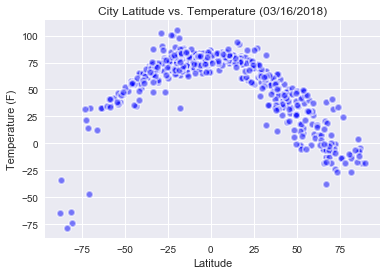

In [74]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(axis_lat, axis_temp, marker="o",color="blue",s=50, linewidths=2,edgecolor='w',alpha=0.5)
ax.set_title("City Latitude vs. Temperature (%s)" % (chart_date))
ax.set_xlabel("Latitude")
ax.set_ylabel("Temperature (F)")
sns.set()
plt.savefig('lat_temp.png')
plt.show()

### Latitude vs. Humidity Plot

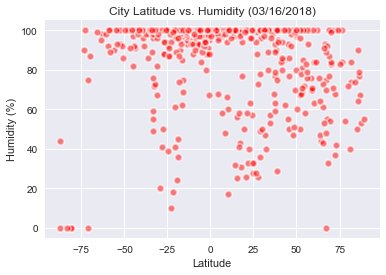

In [75]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(axis_lat,axis_humd, marker="o",color="red",s=50, linewidths=2,edgecolor='w',alpha=0.5)
ax.set_title("City Latitude vs. Humidity (%s)" % (chart_date))
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
sns.set()
plt.savefig('lat_humidity.png')
plt.show()

### Latitude vs. Cloudiness Plot

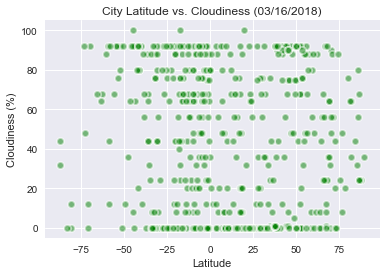

In [76]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(axis_lat, axis_cloud, marker="o",color="green",s=50, linewidths=2,edgecolor='w',alpha=0.5)
ax.set_title("City Latitude vs. Cloudiness (%s)" % (chart_date))
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
sns.set()
plt.savefig('lat_cloud.png')
plt.show()

### Latitude vs. Wind Speed Plot

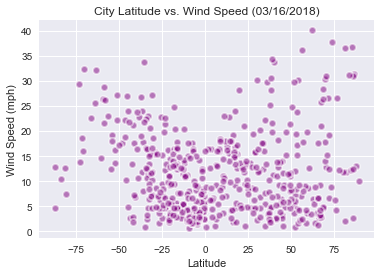

In [77]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter( axis_lat,axis_wind,marker="o",color="purple",s=50, linewidths=2,edgecolor='w',alpha=0.5)
ax.set_title("City Latitude vs. Wind Speed (%s)" % (chart_date))
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph)")
sns.set()
plt.savefig('lat_wind.png')
plt.show()

### Output Results

In [78]:
cities_df.to_csv('weather_cities.csv')